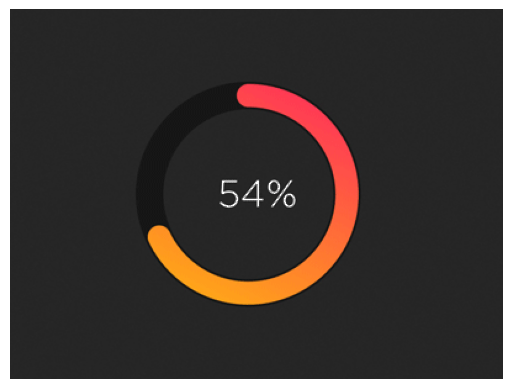

In [30]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img_path = r'C:\Users\Administrator\Documents\GitHub\Artificial-Intellegence-Learning-Platform\static\saved\progress-chart.gif'
img = Image.open(img_path)

frames = []

for frame in range(img.n_frames):
    img.seek(frame) 
    frame_img = img.convert("RGBA")  
    
    frame_array = np.array(frame_img)
    
    lower_bound = np.array([200, 200, 200, 255])   
    upper_bound = np.array([255, 255, 255, 255])  

    mask = cv2.inRange(frame_array, lower_bound, upper_bound)

    frame_array[mask == 255] = [0, 0, 0, 0]

    new_frame_img = Image.fromarray(frame_array)
    
    frames.append(new_frame_img)

output_path = r'C:\Users\Administrator\Documents\GitHub\Artificial-Intellegence-Learning-Platform\static\saved\progress-chart-no-background.gif'
frames[0].save(output_path, save_all=True, append_images=frames[1:], optimize=False, loop=0)

plt.imshow(frames[0])
plt.axis('off')
plt.show()


In [ ]:
import torch
import torch.nn as nn
from torch_snippets import *
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.transforms import transforms as T
from PIL import Image

weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

for param in model.parameters():
    param.requires_grad = False

model_loc = r"C:\Users\Administrator\Documents\GitHub\Artificial-Intellegence-Learning-Platform\static\models_or_datasets\resnet_50.pth"
torch.save(model.state_dict(), model_loc)

class_labels = weights.meta["categories"]

model = resnet50(weights=None)   
model.load_state_dict(torch.load(model_loc, weights_only=True))
model.eval()

preprocess = weights.transforms()

image_path = r"C:\Users\Administrator\Documents\GitHub\Artificial-Intellegence-Learning-Platform\static\uploaded\462547393_1732794090877919_2669056295442298137_n.jpg"
img = Image.open(image_path).convert("RGB")  
img_tensor = preprocess(img).unsqueeze(0)   

with torch.no_grad():
    outputs = model(img_tensor)
    probabilities = torch.softmax(outputs, dim=1)
    top_prob, top_class = probabilities.topk(1, dim=1)  
    predicted_label = class_labels[top_class.item()]   

show(image_path, title=f"{predicted_label} ({top_prob.item() * 100:.2f}%)")

In [13]:
import torch
from torchvision.models import resnet50, ResNet50_Weights

weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

torch.save(model, r"C:\Users\Administrator\Documents\GitHub\Artificial-Intellegence-Learning-Platform\static\models_or_datasets/Resnet_50.pth")


# Mask R-CNN (Instance Segmentation)

In [32]:
import torch
from torchvision import models

model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)

torch.save(model, r"C:\Users\Administrator\Documents\GitHub\Artificial-Intellegence-Learning-Platform\static\models_or_datasets\MaskRCNN_ResNet50_FPN.pth")


In [ ]:
import torch

model_path = r"C:\Users\Administrator\Documents\GitHub\Artificial-Intellegence-Learning-Platform\static\models_or_datasets\MaskRCNN_ResNet50_FPN.pth"

model = torch.load(model_path, map_location=torch.device('cpu'))
model.eval()


In [ ]:
from torchvision import transforms
from PIL import Image

preprocess = transforms.Compose([
    transforms.ToTensor(), 
])

image_path = "static/uploaded/462547393_1732794090877919_2669056295442298137_n.jpg"
img = Image.open(image_path).convert("RGB")  
img_tensor = preprocess(img)

with torch.no_grad():
    predictions = model([img_tensor]) 

for i, prediction in enumerate(predictions):
    print(f"Image {i + 1}")
    print("Predicted Boxes:", prediction['boxes'])
    print("Predicted Labels:", prediction['labels'])
    print("Predicted Masks:", prediction['masks'])


In [ ]:
import cv2
import numpy as np

def visualize_predictions(image_path, predictions):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for box, label, mask in zip(predictions[0]['boxes'], predictions[0]['labels'], predictions[0]['masks']):
        box = box.cpu().numpy().astype(int)
        mask = mask[0].cpu().numpy() 

        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)

        mask = (mask > 0.5).astype(np.uint8) * 255   
        img[mask > 0] = (0, 255, 0)   

    cv2.imshow("Predictions", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

visualize_predictions(image_path, predictions)


In [ ]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights

weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
model = maskrcnn_resnet50_fpn(weights = weights)
classes = weights.meta['categories']
classes[1]